In [1]:
!pip install qiskit ipywidgets

'pip' is not recognized as an internal or external command,
operable program or batch file.


In [2]:
import qiskit
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit import Aer, transpile, assemble
import math
import random
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt
import qiskit.tools.jupyter
%qiskit_version_table
vers_qis = qiskit.__qiskit_version__['qiskit']

In [3]:
def apply_fixed_ansatz(qubits, parameters):

    for iz in range (0, len(qubits)):
        circ.ry(parameters[0][iz], qubits[iz])

    circ.cz(qubits[0], qubits[1])
    circ.cz(qubits[2], qubits[0])

    for iz in range (0, len(qubits)):
        circ.ry(parameters[1][iz], qubits[iz])

    circ.cz(qubits[1], qubits[2])
    circ.cz(qubits[2], qubits[0])

    for iz in range (0, len(qubits)):
        circ.ry(parameters[2][iz], qubits[iz])

circ = QuantumCircuit(3)
apply_fixed_ansatz([0, 1, 2], [ [1, 1, 1], [1, 1, 1], [1, 1, 1] ])
circ.draw()

┌───────┐      ┌───────┐      ┌───────┐
q_0: ┤ Ry(1) ├─■──■─┤ Ry(1) ├────■─┤ Ry(1) ├
     ├───────┤ │  │ ├───────┤    │ ├───────┤
q_1: ┤ Ry(1) ├─■──┼─┤ Ry(1) ├─■──┼─┤ Ry(1) ├
     ├───────┤    │ ├───────┤ │  │ ├───────┤
q_2: ┤ Ry(1) ├────■─┤ Ry(1) ├─■──■─┤ Ry(1) ├
     └───────┘      └───────┘      └───────┘

In [4]:
# Creates the Hadamard test

def had_test(gate_type, qubits, auxiliary_index, parameters):

    circ.h(auxiliary_index)

    apply_fixed_ansatz(qubits, parameters)

    for ie in range (0, len(gate_type[0])):
        if (gate_type[0][ie] == 1):
            circ.cz(auxiliary_index, qubits[ie])

    for ie in range (0, len(gate_type[1])):
        if (gate_type[1][ie] == 1):
            circ.cz(auxiliary_index, qubits[ie])
    
    circ.h(auxiliary_index)
    
circ = QuantumCircuit(4)
had_test([ [0, 0, 0], [0, 0, 1] ], [1, 2, 3], 0, [ [1, 1, 1], [1, 1, 1], [1, 1, 1] ])
circ.draw()

┌───┐                                   ┌───┐
q_0: ──┤ H ├─────────────────────────────────■─┤ H ├
     ┌─┴───┴─┐      ┌───────┐      ┌───────┐ │ └───┘
q_1: ┤ Ry(1) ├─■──■─┤ Ry(1) ├────■─┤ Ry(1) ├─┼──────
     ├───────┤ │  │ ├───────┤    │ ├───────┤ │      
q_2: ┤ Ry(1) ├─■──┼─┤ Ry(1) ├─■──┼─┤ Ry(1) ├─┼──────
     ├───────┤    │ ├───────┤ │  │ ├───────┤ │      
q_3: ┤ Ry(1) ├────■─┤ Ry(1) ├─■──■─┤ Ry(1) ├─■──────
     └───────┘      └───────┘      └───────┘

In [5]:
# Creates controlled anstaz for calculating |<b|psi>|^2 with a Hadamard test

def control_fixed_ansatz(qubits, parameters, auxiliary, reg):

    for i in range (0, len(qubits)):
        circ.cry(parameters[0][i], qiskit.circuit.Qubit(reg, auxiliary), qiskit.circuit.Qubit(reg, qubits[i]))

    circ.ccx(auxiliary, qubits[1], 4)
    circ.cz(qubits[0], 4)
    circ.ccx(auxiliary, qubits[1], 4)

    circ.ccx(auxiliary, qubits[0], 4)
    circ.cz(qubits[2], 4)
    circ.ccx(auxiliary, qubits[0], 4)

    for i in range (0, len(qubits)):
        circ.cry(parameters[1][i], qiskit.circuit.Qubit(reg, auxiliary), qiskit.circuit.Qubit(reg, qubits[i]))

    circ.ccx(auxiliary, qubits[2], 4)
    circ.cz(qubits[1], 4)
    circ.ccx(auxiliary, qubits[2], 4)

    circ.ccx(auxiliary, qubits[0], 4)
    circ.cz(qubits[2], 4)
    circ.ccx(auxiliary, qubits[0], 4)

    for i in range (0, len(qubits)):
        circ.cry(parameters[2][i], qiskit.circuit.Qubit(reg, auxiliary), qiskit.circuit.Qubit(reg, qubits[i]))

q_reg = QuantumRegister(5)
circ = QuantumCircuit(q_reg)
control_fixed_ansatz([1, 2, 3], [ [1, 1, 1], [1, 1, 1], [1, 1, 1] ], 0, q_reg)
circ.draw()

»
q0_0: ────■────────■────────■──────■───────■────■───────■──────■────────■────»
      ┌───┴───┐    │        │      │       │    │       │  ┌───┴───┐    │    »
q0_1: ┤ Ry(1) ├────┼────────┼──────┼───■───┼────■───────■──┤ Ry(1) ├────┼────»
      └───────┘┌───┴───┐    │      │   │   │    │       │  └───────┘┌───┴───┐»
q0_2: ─────────┤ Ry(1) ├────┼──────■───┼───■────┼───────┼───────────┤ Ry(1) ├»
               └───────┘┌───┴───┐  │   │   │    │       │           └───────┘»
q0_3: ──────────────────┤ Ry(1) ├──┼───┼───┼────┼───■───┼────────────────────»
                        └───────┘┌─┴─┐ │ ┌─┴─┐┌─┴─┐ │ ┌─┴─┐                  »
q0_4: ───────────────────────────┤ X ├─■─┤ X ├┤ X ├─■─┤ X ├──────────────────»
                                 └───┘   └───┘└───┘   └───┘                  »
«                                                                    
«q0_0: ────■──────■───────■────■───────■──────■────────■────────■────
«          │      │       │    │       │  ┌───┴───┐    │        │    
«q0_1: ────┼──────┼───────┼────■───────■──┤ Ry(1) ├────┼────────┼────
«          │      │       │    │       │  └───────┘┌───┴───┐    │    
«q0_2: ────┼──────┼───■───┼────┼───────┼───────────┤ Ry(1) ├────┼────
«      ┌───┴───┐  │   │   │    │       │           └───────┘┌───┴───┐
«q0_3: ┤ Ry(1) ├──■───┼───■────┼───■───┼────────────────────┤ Ry(1) ├
«      └───────┘┌─┴─┐ │ ┌─┴─┐┌─┴─┐ │ ┌─┴─┐                  └───────┘
«q0_4: ─────────┤ X ├─■─┤ X ├┤ X ├─■─┤ X ├───────────────────────────
«               └───┘   └───┘└───┘   └───┘

In [6]:
def control_b(auxiliary, qubits):

    for ia in qubits:
        circ.ch(auxiliary, ia)

circ = QuantumCircuit(4)
control_b(0, [1, 2, 3])
circ.draw()

q_0: ──■────■────■──
     ┌─┴─┐  │    │  
q_1: ┤ H ├──┼────┼──
     └───┘┌─┴─┐  │  
q_2: ─────┤ H ├──┼──
          └───┘┌─┴─┐
q_3: ──────────┤ H ├
               └───┘

In [7]:
# Create the controlled Hadamard test, for calculating <psi|psi>

def special_had_test(gate_type, qubits, auxiliary_index, parameters, reg):

    circ.h(auxiliary_index)

    control_fixed_ansatz(qubits, parameters, auxiliary_index, reg)

    for ty in range (0, len(gate_type)):
        if (gate_type[ty] == 1):
            circ.cz(auxiliary_index, qubits[ty])


    control_b(auxiliary_index, qubits)
    
    circ.h(auxiliary_index)

q_reg = QuantumRegister(5)
circ = QuantumCircuit(q_reg)
special_had_test([ [0, 0, 0], [0, 0, 1] ], [1, 2, 3], 0, [ [1, 1, 1], [1, 1, 1], [1, 1, 1] ], q_reg)
circ.draw()

┌───┐                                                              »
q1_0: ┤ H ├────■────────■────────■──────■───────■────■───────■──────■────»
      └───┘┌───┴───┐    │        │      │       │    │       │  ┌───┴───┐»
q1_1: ─────┤ Ry(1) ├────┼────────┼──────┼───■───┼────■───────■──┤ Ry(1) ├»
           └───────┘┌───┴───┐    │      │   │   │    │       │  └───────┘»
q1_2: ──────────────┤ Ry(1) ├────┼──────■───┼───■────┼───────┼───────────»
                    └───────┘┌───┴───┐  │   │   │    │       │           »
q1_3: ───────────────────────┤ Ry(1) ├──┼───┼───┼────┼───■───┼───────────»
                             └───────┘┌─┴─┐ │ ┌─┴─┐┌─┴─┐ │ ┌─┴─┐         »
q1_4: ────────────────────────────────┤ X ├─■─┤ X ├┤ X ├─■─┤ X ├─────────»
                                      └───┘   └───┘└───┘   └───┘         »
«                                                                             »
«q1_0: ────■────────■──────■───────■────■───────■──────■────────■────────■────»
«          │        │      │       │    │       │  ┌───┴───┐    │        │    »
«q1_1: ────┼────────┼──────┼───────┼────■───────■──┤ Ry(1) ├────┼────────┼────»
«      ┌───┴───┐    │      │       │    │       │  └───────┘┌───┴───┐    │    »
«q1_2: ┤ Ry(1) ├────┼──────┼───■───┼────┼───────┼───────────┤ Ry(1) ├────┼────»
«      └───────┘┌───┴───┐  │   │   │    │       │           └───────┘┌───┴───┐»
«q1_3: ─────────┤ Ry(1) ├──■───┼───■────┼───■───┼────────────────────┤ Ry(1) ├»
«               └───────┘┌─┴─┐ │ ┌─┴─┐┌─┴─┐ │ ┌─┴─┐                  └───────┘»
«q1_4: ──────────────────┤ X ├─■─┤ X ├┤ X ├─■─┤ X ├───────────────────────────»
«                        └───┘   └───┘└───┘   └───┘                           »
«                     ┌───┐
«q1_0: ──■────■────■──┤ H ├
«      ┌─┴─┐  │    │  └───┘
«q1_1: ┤ H ├──┼────┼───────
«      └───┘┌─┴─┐  │       
«q1_2: ─────┤ H ├──┼───────
«           └───┘┌─┴─┐     
«q1_3: ──────────┤ H ├─────
«                └───┘     
«q1_4: ────────────────────
«

In [8]:
# Implements the entire cost function on the quantum circuit

def calculate_cost_function(parameters):
    
    global opt,current_cost

    overall_sum_1 = 0
    
    parameters = [parameters[0:3], parameters[3:6], parameters[6:9] ]

    for i in range(0, len(gate_set)):
        for j in range(0, len(gate_set)):

            global circ

            qctl = QuantumRegister(5)
            qc = ClassicalRegister(5)
            circ = QuantumCircuit(qctl, qc)

            backend = Aer.get_backend('aer_simulator')
            
            multiply = coefficient_set[i]*coefficient_set[j]

            had_test([gate_set[i], gate_set[j] ], [1, 2, 3], 0, parameters)

            circ.save_statevector()
            t_circ = transpile(circ, backend)
            qobj = assemble(t_circ)
            
            if (vers_qis == '0.42.0'):
              job = backend.run(t_circ)
            else:
              job = backend.run(qobj)

            result = job.result()
            outputstate = np.real(result.get_statevector(circ, decimals=100))
            o = outputstate

            m_sum = 0
            for l in range (0, len(o)):
                if (l%2 == 1):
                    n = o[l]**2
                    m_sum+=n

            overall_sum_1+=multiply*(1-(2*m_sum))

    overall_sum_2 = 0

    for i in range(0, len(gate_set)):
        for j in range(0, len(gate_set)):

            multiply = coefficient_set[i]*coefficient_set[j]
            mult = 1

            for extra in range(0, 2):

                qctl = QuantumRegister(5)
                qc = ClassicalRegister(5)
                circ = QuantumCircuit(qctl, qc)

                backend = Aer.get_backend('aer_simulator')

                if (extra == 0):
                    special_had_test(gate_set[i], [1, 2, 3], 0, parameters, qctl)
                if (extra == 1):
                    special_had_test(gate_set[j], [1, 2, 3], 0, parameters, qctl)

                circ.save_statevector()    
                t_circ = transpile(circ, backend)
                qobj = assemble(t_circ)
                if (vers_qis == '0.42.0'):
                  job = backend.run(t_circ)
                else:
                  job = backend.run(qobj)
                  
                result = job.result()
                outputstate = np.real(result.get_statevector(circ, decimals=100))
                o = outputstate

                m_sum = 0
                for l in range (0, len(o)):
                    if (l%2 == 1):
                        n = o[l]**2
                        m_sum+=n
                mult = mult*(1-(2*m_sum))

            overall_sum_2+=multiply*mult
            
    print(1-float(overall_sum_2/overall_sum_1))
    current_cost = 1-float(overall_sum_2/overall_sum_1)

    #return 1-float(overall_sum_2/overall_sum_1)
    return current_cost

In [9]:
def log_cost(x):
  cost_values.append(current_cost)


coefficient_set = [0.55, 0.45]
gate_set = [ [0, 0, 0], [0, 0, 1] ]

max_iter = 200
cost_sum = np.zeros(max_iter+1)
opt_iter = 1
nqubits = 3
anci_bits = 3

for i in range(opt_iter):
 cost_values = [] 
 out = minimize(calculate_cost_function, x0=[float(random.randint(0,3000))/1000 for i in range(0, 9)], method="COBYLA", options={'maxiter':max_iter}, callback=log_cost)
 print(out)
 cost_sum = cost_sum + np.array(cost_values)

 out_f = [out['x'][0:3], out['x'][3:6], out['x'][6:9] ]

 circ = QuantumCircuit(nqubits, anci_bits)
 apply_fixed_ansatz([0, 1, 2], out_f)
 circ.save_statevector()

 backend = Aer.get_backend('aer_simulator')
 t_circ = transpile(circ, backend)
 qobj = assemble(t_circ)
 if (vers_qis == '0.42.0'):
  job = backend.run(t_circ)
 else:
  job = backend.run(qobj)

 result = job.result()
 o = result.get_statevector(circ, decimals=10)

 #a1 = coefficient_set[1]*np.array([ [1,0,0,0,0,0,0,0], [0,1,0,0,0,0,0,0], [0,0,1,0,0,0,0,0], [0,0,0,1,0,0,0,0], [0,0,0,0,-1,0,0,0], [0,0,0,0,0,-1,0,0], [0,0,0,0,0,0,-1,0], [0,0,0,0,0,0,0,-1] ])
 #a2 = coefficient_set[0]*np.array([ [1,0,0,0,0,0,0,0], [0,1,0,0,0,0,0,0], [0,0,1,0,0,0,0,0], [0,0,0,1,0,0,0,0], [0,0,0,0,1,0,0,0], [0,0,0,0,0,1,0,0], [0,0,0,0,0,0,1,0], [0,0,0,0,0,0,0,1] ])
 #b = np.array([float(1/np.sqrt(8)),float(1/np.sqrt(8)),float(1/np.sqrt(8)),float(1/np.sqrt(8)),float(1/np.sqrt(8)),float(1/np.sqrt(8)),float(1/np.sqrt(8)),float(1/np.sqrt(8))])

 Z = np.array([[1,0], [0,-1]])
 I = np.identity(2)
 a2 = coefficient_set[0]*np.identity(2**nqubits)
 a1 = coefficient_set[1]*np.kron(np.kron(Z,I),I)
 b = np.ones(2**nqubits)/np.sqrt(2**nqubits)

 a3 = np.add(a1, a2)


 print((b.dot(a3.dot(o)/(np.linalg.norm(a3.dot(o)))))**2)


C:\Users\fouad\AppData\Local\Temp\ipykernel_12304\3358240795.py:33: DeprecationWarning: Using a qobj for run() is deprecated as of qiskit-aer 0.9.0 and will be removed no sooner than 3 months from that release date. Transpiled circuits should now be passed directly using `backend.run(circuits, **run_options).
  job = backend.run(qobj)
C:\Users\fouad\AppData\Local\Temp\ipykernel_12304\3358240795.py:74: DeprecationWarning: Using a qobj for run() is deprecated as of qiskit-aer 0.9.0 and will be removed no sooner than 3 months from that release date. Transpiled circuits should now be passed directly using `backend.run(circuits, **run_options).
  job = backend.run(qobj)


0.9980548117563423
0.9999614420152417
0.9985340689713248
0.9859202115718234
0.9909871157736222
0.9996866312537155
0.9863189451779446
0.875221923636514
0.9395469624159926
0.8324026718444338
0.7337312086249586
0.7221632341524222
0.6795248281350099
0.934312308034562
0.5709267230814021
0.5083058314942601
0.5233138392204693
0.5193653501269054
0.4815294559310752
0.6711491407209729
0.5803998538046311
0.47891169492643837
0.49088831047319825
0.47397729330307314
0.46856818121781263
0.475177955968641
0.5128390098537468
0.4363295472324602
0.5002298485139085
0.4398734009479641
0.5034292124316405
0.4252185865400274
0.4088064417258276
0.4371996341215101
0.41127887609832026
0.47163670332227126
0.4133650184677852
0.4400134576079807
0.4454457672526614
0.3633383386770538
0.44913729564425586
0.3529925628940659
0.3581652805586476
0.3388959023249627
0.3606177279093863
0.3175370179793242
0.3411950878127299
0.3330461546616683
0.3222152462383576
0.35689881214581676
0.3149419216269107
0.2912026590597038
0.28884

C:\Users\fouad\AppData\Local\Temp\ipykernel_12304\3709679426.py:32: DeprecationWarning: Using a qobj for run() is deprecated as of qiskit-aer 0.9.0 and will be removed no sooner than 3 months from that release date. Transpiled circuits should now be passed directly using `backend.run(circuits, **run_options).
  job = backend.run(qobj)


[0.9980548117563423, 0.9999614420152417, 0.9985340689713248, 0.9859202115718234, 0.9909871157736222, 0.9996866312537155, 0.9863189451779446, 0.875221923636514, 0.9395469624159926, 0.8324026718444338, 0.7337312086249586, 0.7221632341524222, 0.6795248281350099, 0.934312308034562, 0.5709267230814021, 0.5083058314942601, 0.5233138392204693, 0.5193653501269054, 0.4815294559310752, 0.6711491407209729, 0.5803998538046311, 0.47891169492643837, 0.49088831047319825, 0.47397729330307314, 0.46856818121781263, 0.475177955968641, 0.5128390098537468, 0.4363295472324602, 0.5002298485139085, 0.4398734009479641, 0.5034292124316405, 0.4252185865400274, 0.4088064417258276, 0.4371996341215101, 0.41127887609832026, 0.47163670332227126, 0.4133650184677852, 0.4400134576079807, 0.4454457672526614, 0.3633383386770538, 0.44913729564425586, 0.3529925628940659, 0.3581652805586476, 0.3388959023249627, 0.3606177279093863, 0.3175370179793242, 0.3411950878127299, 0.3330461546616683, 0.3222152462383576, 0.3568988121458

Text(0.5, 1.0, 'Average cost after 1 runs')

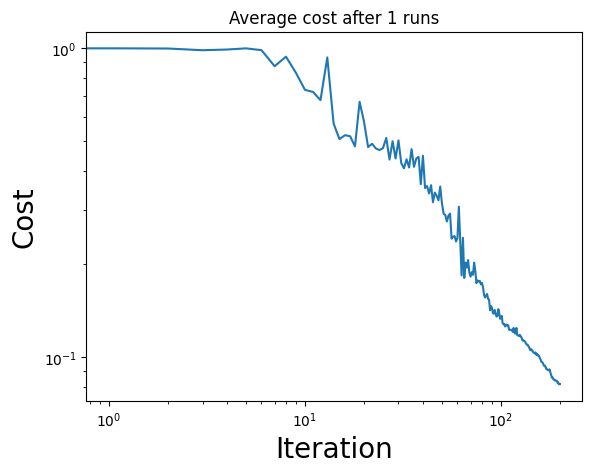

In [10]:
print(cost_values)
print(np.shape(np.array(cost_values)))

plt.loglog(cost_sum/opt_iter)
plt.xlabel('Iteration',fontsize=20)
plt.ylabel('Cost',fontsize=20)
plt.title('Average cost after '+ str(opt_iter) + ' runs')